## Neural Networks algorithm
### Dataset 1

In [1]:
import nbimporter

from Helper import * 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

random_seed = 42

Importing Jupyter notebook from Helper.ipynb


In [2]:
X_train, X_test, y_train, y_test = import_dataset1()

number of training samples:  24129
number of test samples:  6033


In [4]:
X_train = scaler.fit_transform(X_train,)
X_test = scaler.transform(X_test)

In [7]:
estimator = MLPClassifier(hidden_layer_sizes=(
    100, ), early_stopping=False,activation='relu', learning_rate_init=0.001, solver='adam', max_iter=50)

estimator2 = MLPClassifier(hidden_layer_sizes=(
    100, 32), early_stopping=True,activation='relu', learning_rate_init=0.001, solver='adam', max_iter=50)

estimator3 = MLPClassifier(hidden_layer_sizes=(
    128, 32), early_stopping=True,activation='relu', learning_rate_init=0.001, solver='adam', max_iter=50)

estimator4 = MLPClassifier(hidden_layer_sizes=(
    128, 32, 16), early_stopping=True,activation='relu', learning_rate_init=0.001, solver='adam', max_iter=50)

estimator5 = MLPClassifier(hidden_layer_sizes=(
    256, 128, 32, 16), early_stopping=True,activation='relu', learning_rate_init=0.001, solver='adam', max_iter=50)

estimator.fit(X_train, y_train)
estimator2.fit(X_train, y_train)
estimator3.fit(X_train, y_train)
estimator4.fit(X_train, y_train)
estimator5.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(256, 128, 32, 16),
              max_iter=50)

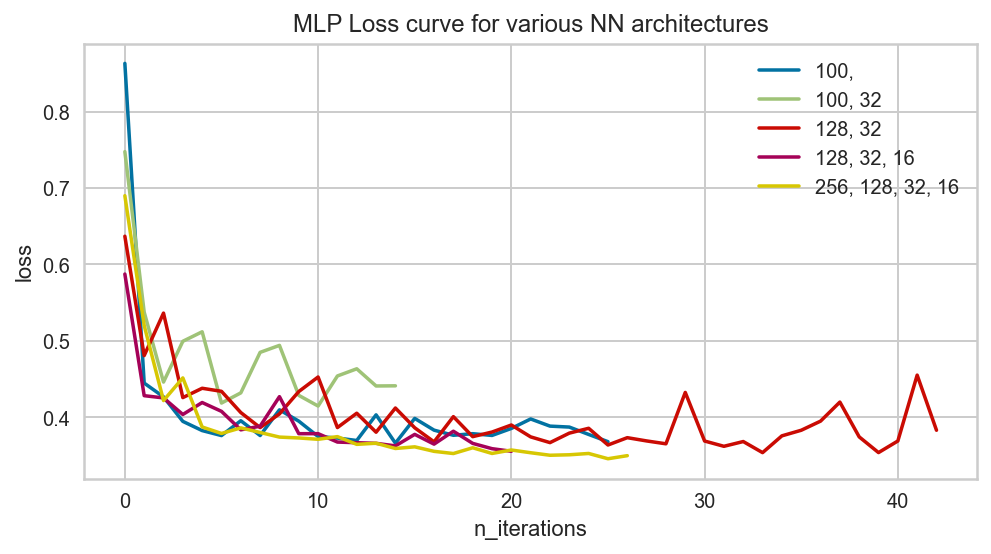

In [8]:
plt.figure(figsize=(8,4));

plt.plot(estimator.loss_curve_, label='100, ',)
plt.plot(estimator2.loss_curve_, label='100, 32')
plt.plot(estimator3.loss_curve_, label='128, 32')
plt.plot(estimator4.loss_curve_, label='128, 32, 16')
plt.plot(estimator5.loss_curve_, label='256, 128, 32, 16')
plt.xlabel('n_iterations')
plt.ylabel('loss')
plt.title('MLP Loss curve for various NN architectures')

plt.legend();

In [9]:
clf = MLPClassifier(
    alpha=0.0001, 
    batch_size='auto',
    learning_rate='constant',
    power_t=0.5, 
    shuffle=True, 
    random_state=random_seed, 
    tol=0.0001,
    verbose=False,
    warm_start=False, 
    momentum=0.9, 
    nesterovs_momentum=True, 
    early_stopping=True, 
    validation_fraction=0.1, 
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=1e-08, 
    n_iter_no_change=10, 
    max_fun=15000)

check_params = dict(activation= ['logistic', 'tanh', 'relu'],
                    solver= ['adam', 'sgd'],
                    learning_rate_init= [0.001, 0.005, 0.010, 0.05, 0.1],
                    hidden_layer_sizes =[(128, 32, 16,), (128, 32, 8), (128, 16, 2)],
                    max_iter= [50, 100, 150, 200])

In [10]:
create_grid = GridSearchCV(clf, param_grid=check_params, cv=StratifiedKFold(5), n_jobs=-1, scoring='roc_auc')
create_grid.fit(X_train, y_train)
print("score :",  create_grid.score(X_test, y_test))
print("Best fit parameters from GridSearchCV: ")
print(create_grid.best_params_)
print('')

score : 0.8945903365511916
Best fit parameters from GridSearchCV: 
{'activation': 'relu', 'hidden_layer_sizes': (128, 32, 16), 'learning_rate_init': 0.001, 'max_iter': 50, 'solver': 'adam'}



Look at alpha in case of overfitting 

/Users/orentevet/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/orentevet/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/orentevet/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/orentevet/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converge

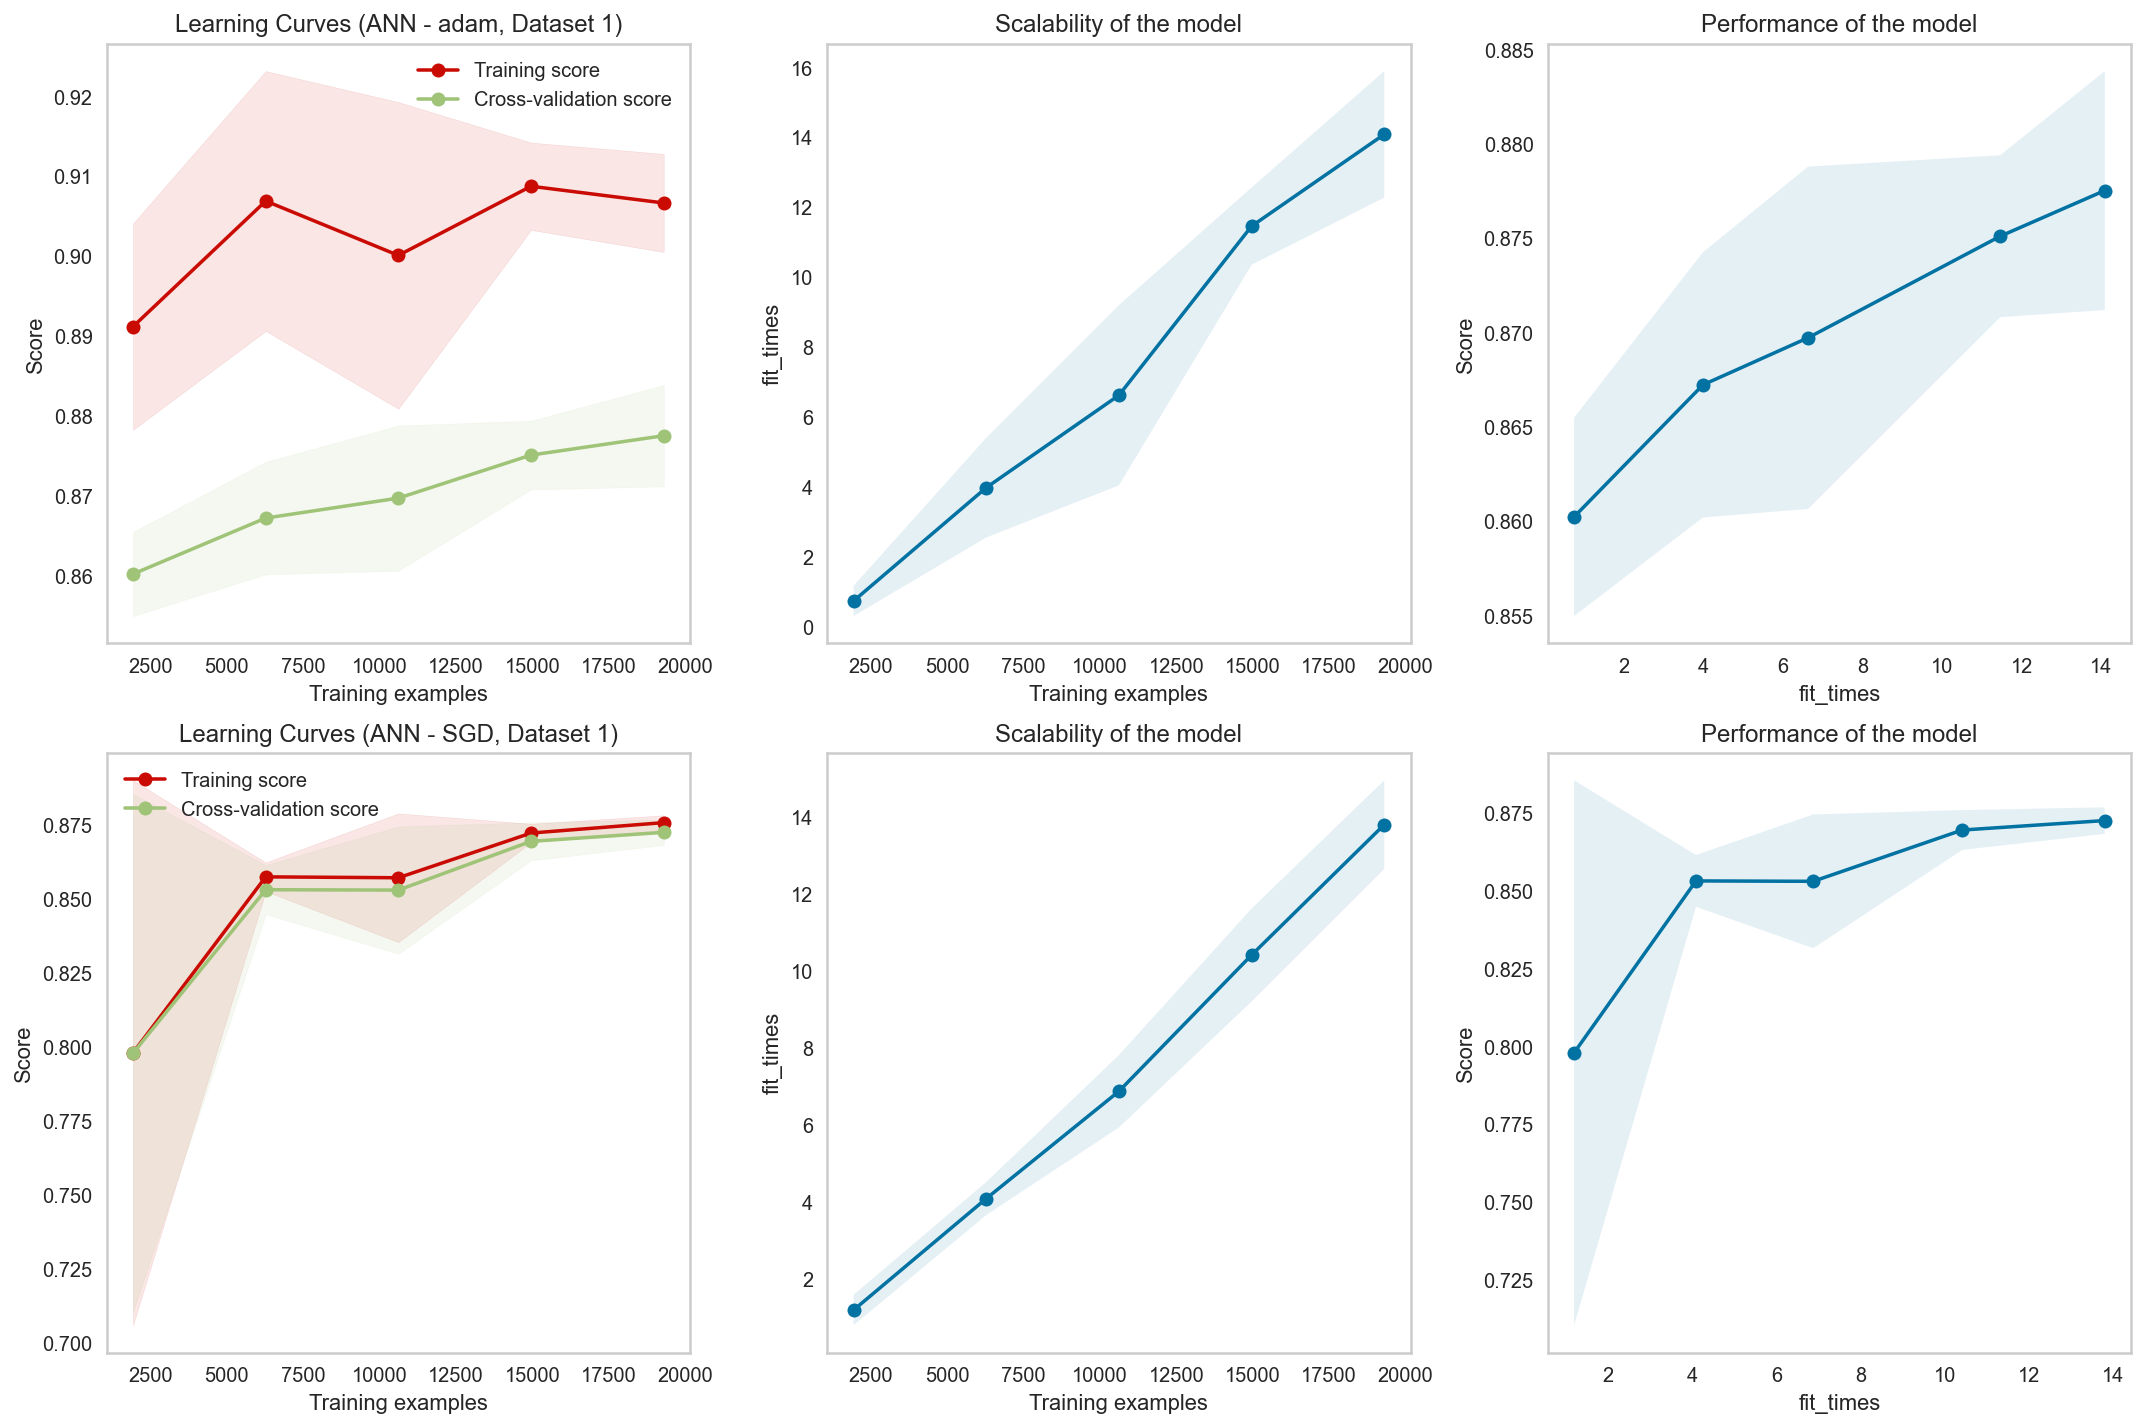

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

title = "Learning Curves (ANN - adam, Dataset 1)"

estimator = MLPClassifier(hidden_layer_sizes=(
    128, 32, 16), activation='relu', learning_rate_init=0.001, solver='adam', max_iter=100)
plot_learning_curve(estimator, title, X_train, y_train,
                    cv=StratifiedKFold(5), n_jobs=1, axes=axes[0, :])

estimator1 = MLPClassifier(hidden_layer_sizes=(
    128, 32, 16), activation='relu', learning_rate_init=0.001, solver='sgd', max_iter=100)
title = "Learning Curves (ANN - SGD, Dataset 1)"

plot_learning_curve(estimator1, title, X_train, y_train,
                    cv=StratifiedKFold(5), n_jobs=1, axes=axes[1, :])

plt.tight_layout()
plt.show()

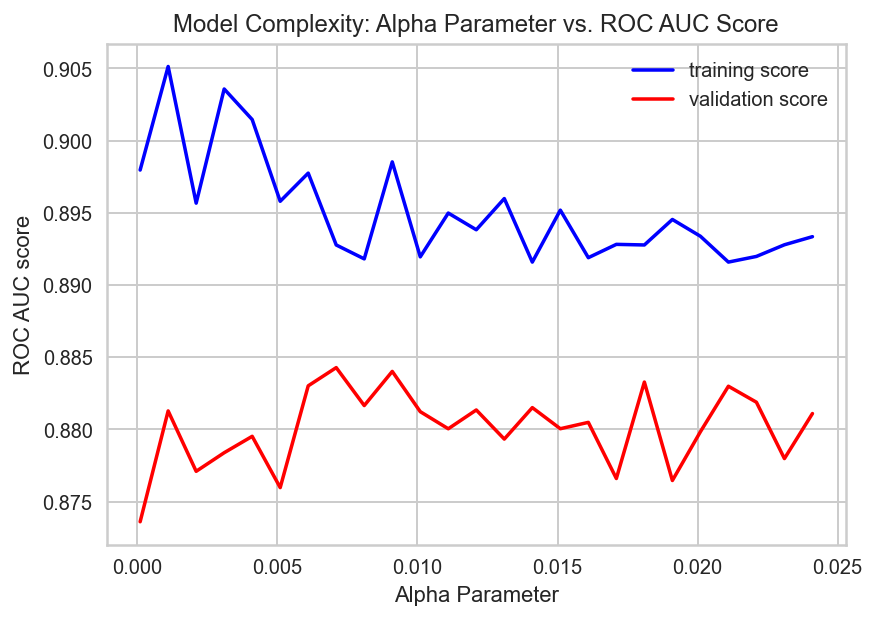

In [14]:
parameter_range = np.arange(0.0001, 0.025, 0.001)

train_score, val_score = validation_curve(MLPClassifier(hidden_layer_sizes=(128, 32, 16),
                                                         activation='relu', 
                                                         learning_rate_init=0.001,
                                                         solver='adam',
                                                         max_iter=100),
                                          X_train, y_train, 
                                          scoring = 'roc_auc',
                                          param_name = 'alpha', 
                                          param_range = parameter_range,
                                          cv=StratifiedKFold(5))

plt.plot(parameter_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(parameter_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Model Complexity: Alpha Parameter vs. ROC AUC Score')
#plt.ylim(0, 1)
plt.xlabel('Alpha Parameter')
plt.ylabel('ROC AUC score');

In [32]:
estimator_final = MLPClassifier(hidden_layer_sizes=(
    128, 32, 16), early_stopping=True,activation='relu', learning_rate_init=0.001, solver='adam', max_iter=100, alpha=0.02)

In [41]:
%%time
estimator_final.fit(X_train, y_train)

CPU times: user 31.5 s, sys: 4.82 s, total: 36.3 s
Wall time: 4.7 s


MLPClassifier(alpha=0.02, early_stopping=True, hidden_layer_sizes=(128, 32, 16),
              max_iter=100)

In [40]:
%%timeit
y_pred = estimator_final.predict(X_test)

14.2 ms ± 767 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


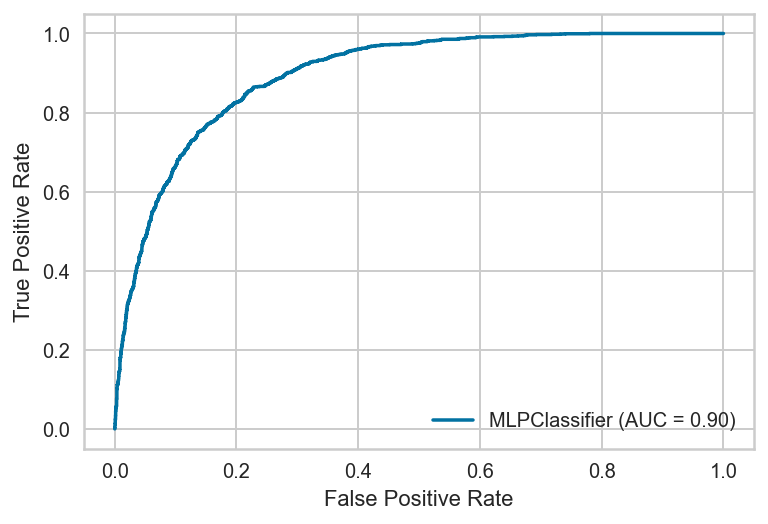

In [35]:
plot_roc_curve(estimator_final, X_test, y_test);

In [36]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
display(df_report)

,precision,recall,f1-score,support
0,0.873695,0.923637,0.897972,4531.000000
1,0.721641,0.597204,0.653552,1502.000000
accuracy,0.842367,0.842367,0.842367,0.842367
macro avg,0.797668,0.760420,0.775762,6033.000000
weighted avg,0.835839,0.842367,0.837120,6033.000000
